<a href="https://colab.research.google.com/github/wahyu12v/bundle-analyzer/blob/main/UTS_NLP_(210401011_Ardian_Wahyu_Saputra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inisiasi Dataset

Dataset Sebelum Preprocessing:
                                        comment_text  toxic
0  This letter perfectly illustrates why any hope...      1
1  One muslim casualty vs the hundreds and thousa...      1
2  (fuck you Osama bin laden and your afghanistan...      1
3  As long as Trump keeps Stiggin' It to the libs...      1
4  This article is a load of crap....  Another Fa...      1

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_text  20000 non-null  object
 1   toxic         20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None

Distribusi Label:
toxic
1    10000
0    10000
Name: count, dtype: int64


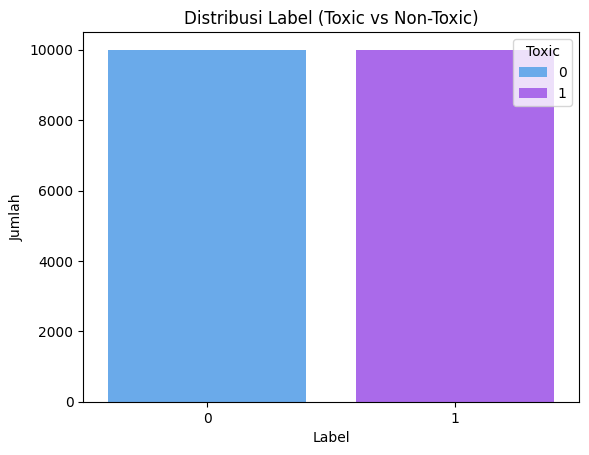

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset_path = "/content/dataset_toxic_comment.csv"
data = pd.read_csv(dataset_path)

# Tampilkan beberapa baris awal dataset
print("Dataset Sebelum Preprocessing:")
print(data.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(data.info())

# Distribusi label
print("\nDistribusi Label:")
print(data['toxic'].value_counts())

# Visualisasi distribusi label dengan perbaikan
sns.countplot(x='toxic', data=data, palette='cool', hue='toxic')
plt.title('Distribusi Label (Toxic vs Non-Toxic)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.legend(title="Toxic")
plt.show()


Pembersihan Kata

In [66]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Mengatur stopwords
stop_words = set(stopwords.words('english'))

# Fungsi pembersihan teks
def clean_text(text):

    text = ''.join([char for char in text if char not in string.punctuation]) # 1. Penghapusan Tanda Baca
    text = ''.join([char for char in text if not char.isdigit()])             # 2. Penghapusan Angka
    text = text.lower()                                                       # 3. Konversi ke Huruf Kecil
    tokens = word_tokenize(text)                                              # 4. Tokenisasi
    cleaned_tokens = [word for word in tokens if word not in stop_words]      # 5. Penghapusan Stopwords
    cleaned_text = ' '.join(cleaned_tokens)                                   # Gabungkan kembali menjadi satu string
    return cleaned_text

# Terapkan pembersihan teks pada dataset
data['cleaned_text'] = data['comment_text'].apply(clean_text)

# Tampilkan hasil akhir preprocessing untuk 20 dokumen pertama
print("\nDataset setelah preprocessing:")
print(data[['comment_text', 'cleaned_text']].head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Dataset setelah preprocessing:
                                         comment_text  \
0   This letter perfectly illustrates why any hope...   
1   One muslim casualty vs the hundreds and thousa...   
2   (fuck you Osama bin laden and your afghanistan...   
3   As long as Trump keeps Stiggin' It to the libs...   
4   This article is a load of crap....  Another Fa...   
5   Joseph Cardinal Zen\nI am already too neutral ...   
6   The antifederalists did not trust the rats Hen...   
7   It's ok to be racist as long as your not a whi...   
8   this goddamn dog is getting more coverage than...   
9   Domestic squabbles? \n\nThat terrorist killed ...   
10  These fat/thin mistakes wouldn't have happened...   
11  " \n\n == ""If justice ever comes here and wan...   
12                         articles talk page asshole   
13  Been there and done that and If I EVER officia...   
14  What's worse are those sheeple following andsu...   
15  What this country needs is a good five cent ci...   

Implementasi Bow

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(data['cleaned_text'])

# Menampilkan fitur (kata-kata) yang dipilih
print("Fitur (kata-kata) pada BoW:", vectorizer_bow.get_feature_names_out())

# Representasi BoW untuk 5 dokumen pertama
print("Representasi BoW untuk 5 dokumen pertama:")
print(X_bow.toarray()[:5])


Fitur (kata-kata) pada BoW: ['aa' 'aaa' 'aaaaaaaaaaaaaaaaaaaaaaaaa' ... '討論' '連絡' '長安']
Representasi BoW untuk 5 dokumen pertama:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


BoW + KNN (N = 3)

(16000, 54341)
(4000, 54341)
(16000,)
(4000,)
Akurasi k-NN: 0.72325
Classification Report k-NN:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76      1981
           1       0.84      0.56      0.67      2019

    accuracy                           0.72      4000
   macro avg       0.75      0.72      0.72      4000
weighted avg       0.75      0.72      0.72      4000

Confusion Matrix:
 [[1757  224]
 [ 883 1136]]


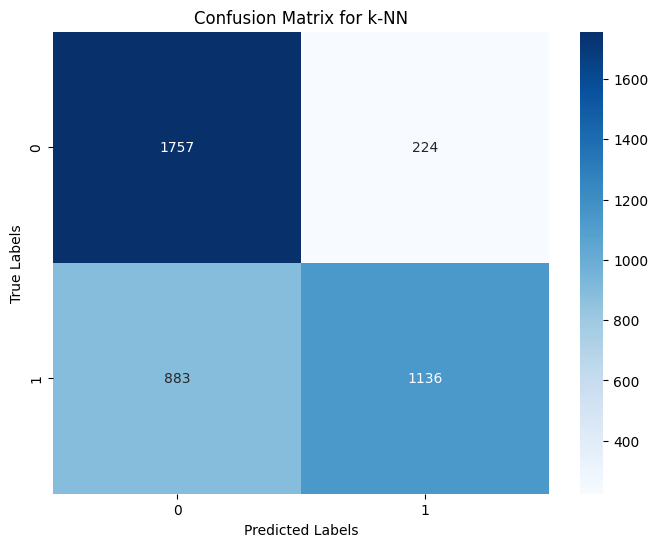

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_bow, data['toxic'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Inisialisasi k-NN dengan parameter n_neighbors=3
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')

# Melatih model dengan data latih
knn_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = knn_model.predict(X_test)

# Evaluasi k-NN
print("Akurasi k-NN:", accuracy_score(y_test, y_pred_knn))
BOWKNNTiga = accuracy_score(y_test, y_pred_knn)
print("Classification Report k-NN:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix for k-NN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


BoW + KNN (N = 5 )

(16000, 54341)
(4000, 54341)
(16000,)
(4000,)
Akurasi k-NN: 0.74575
Classification Report k-NN:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75      1981
           1       0.76      0.73      0.74      2019

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000

Confusion Matrix:
 [[1508  473]
 [ 544 1475]]


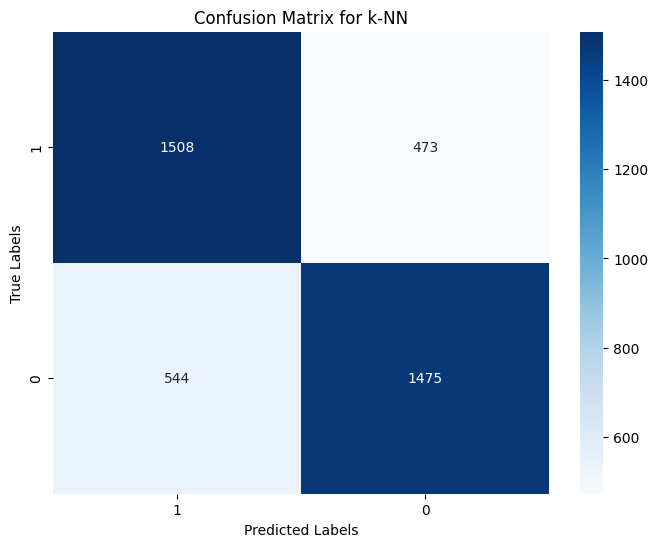

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_bow, data['toxic'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Inisialisasi k-NN dengan parameter n_neighbors=5 (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')

# Melatih model dengan data latih
knn_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = knn_model.predict(X_test)

# Evaluasi k-NN
print("Akurasi k-NN:", accuracy_score(y_test, y_pred_knn))
BOWKNNLima = accuracy_score(y_test, y_pred_knn)
print("Classification Report k-NN:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['toxic'].unique(), yticklabels=data['toxic'].unique())
plt.title('Confusion Matrix for k-NN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


BoW + KNN (N = 7)

(16000, 54341)
(4000, 54341)
(16000,)
(4000,)
Akurasi k-NN: 0.7695
Classification Report k-NN:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      1981
           1       0.78      0.76      0.77      2019

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000

Confusion Matrix:
 [[1550  431]
 [ 491 1528]]


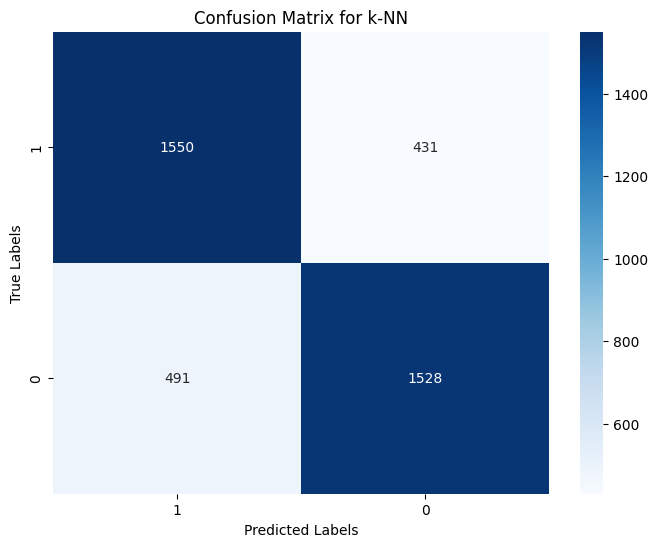

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_bow, data['toxic'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Inisialisasi k-NN dengan parameter n_neighbors=7
knn_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='uniform')

# Melatih model dengan data latih
knn_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = knn_model.predict(X_test)

# Evaluasi k-NN
print("Akurasi k-NN:", accuracy_score(y_test, y_pred_knn))
BOWKNNTujuh = accuracy_score(y_test, y_pred_knn)
print("Classification Report k-NN:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['toxic'].unique(), yticklabels=data['toxic'].unique())
plt.title('Confusion Matrix for k-NN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

BoW + SVM

Akurasi SVM: 0.8915
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      1981
           1       0.91      0.87      0.89      2019

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

Confusion Matrix:
 [[1550  431]
 [ 491 1528]]


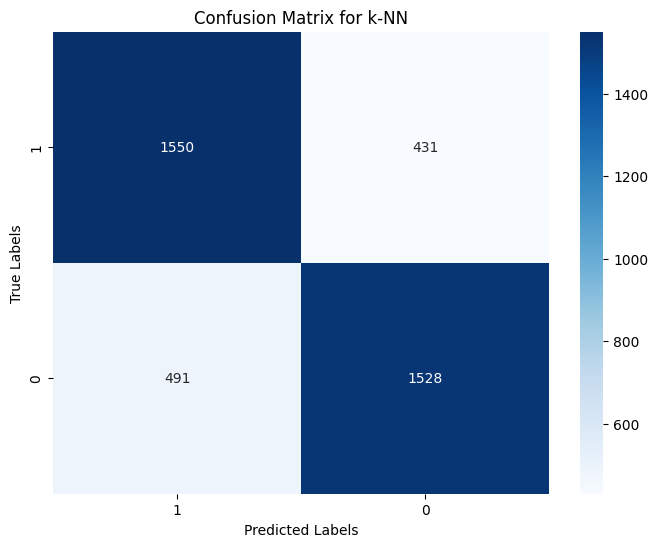

In [71]:
from sklearn.svm import SVC

# Inisialisasi SVM dengan kernel 'linear' dan C=1.0
svm_model = SVC(kernel='linear', C=1.0)

# Melatih model dengan data latih
svm_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)

# Evaluasi SVM
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
BOWSVM = accuracy_score(y_test, y_pred_svm)
print("Classification Report SVM:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['toxic'].unique(), yticklabels=data['toxic'].unique())
plt.title('Confusion Matrix for k-NN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Implementasi TF-IDF

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(data['cleaned_text'])

# Menampilkan fitur (kata-kata) yang dipilih
print("Fitur (kata-kata) pada TF-IDF:", vectorizer_tfidf.get_feature_names_out())

# Representasi TF-IDF untuk 5 dokumen pertama
print("Representasi TF-IDF untuk 5 dokumen pertama:")
print(X_tfidf.toarray()[:5])


Fitur (kata-kata) pada TF-IDF: ['aa' 'aaa' 'aaaaaaaaaaaaaaaaaaaaaaaaa' ... '討論' '連絡' '長安']
Representasi TF-IDF untuk 5 dokumen pertama:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


TF IDF + KNN (N = 3)

(16000, 54341)
(4000, 54341)
(16000,)
(4000,)
Akurasi k-NN: 0.5205
Classification Report k-NN:
               precision    recall  f1-score   support

           0       0.51      1.00      0.67      1981
           1       0.95      0.05      0.10      2019

    accuracy                           0.52      4000
   macro avg       0.73      0.52      0.39      4000
weighted avg       0.73      0.52      0.38      4000

Confusion Matrix:
 [[1976    5]
 [1913  106]]


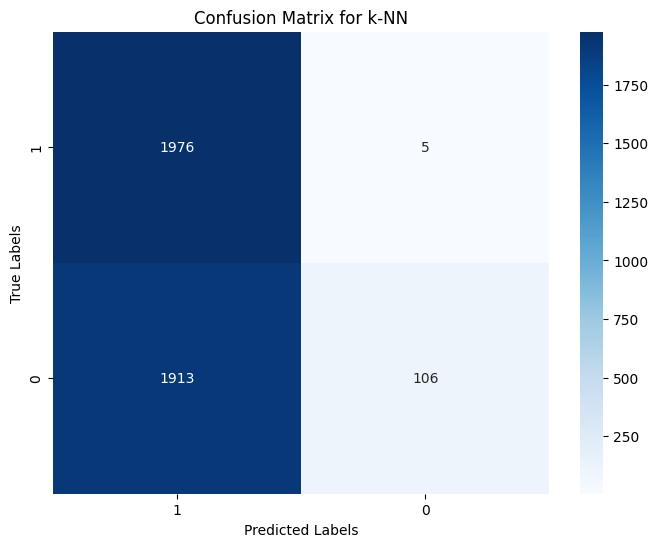

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['toxic'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Inisialisasi k-NN dengan parameter n_neighbors=3
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')

# Melatih model dengan data latih
knn_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = knn_model.predict(X_test)

# Evaluasi k-NN
print("Akurasi k-NN:", accuracy_score(y_test, y_pred_knn))
TFIDFKNNTiga = accuracy_score(y_test, y_pred_knn)
print("Classification Report k-NN:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['toxic'].unique(), yticklabels=data['toxic'].unique())
plt.title('Confusion Matrix for k-NN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


TF IDF + KNN  N = 5

(16000, 54341)
(4000, 54341)
(16000,)
(4000,)
Akurasi k-NN: 0.5365
Classification Report k-NN:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53      1981
           1       0.54      0.54      0.54      2019

    accuracy                           0.54      4000
   macro avg       0.54      0.54      0.54      4000
weighted avg       0.54      0.54      0.54      4000

Confusion Matrix:
 [[1054  927]
 [ 927 1092]]


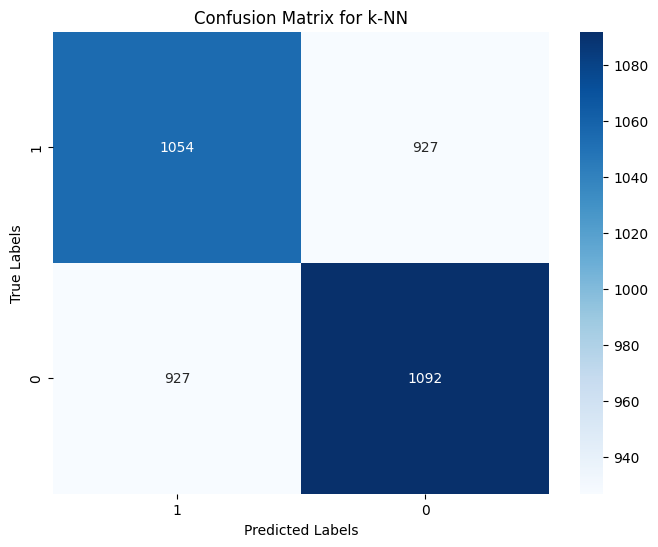

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['toxic'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Inisialisasi k-NN dengan parameter n_neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')

# Melatih model dengan data latih
knn_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = knn_model.predict(X_test)

# Evaluasi k-NN
print("Akurasi k-NN:", accuracy_score(y_test, y_pred_knn))
TFIDFKNNLima = accuracy_score(y_test, y_pred_knn)
print("Classification Report k-NN:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['toxic'].unique(), yticklabels=data['toxic'].unique())
plt.title('Confusion Matrix for k-NN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

TF IDF + KNN (N = 7)

(16000, 54341)
(4000, 54341)
(16000,)
(4000,)
Akurasi k-NN: 0.7685
Classification Report k-NN:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1981
           1       0.77      0.77      0.77      2019

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000

Confusion Matrix:
 [[1520  461]
 [ 465 1554]]


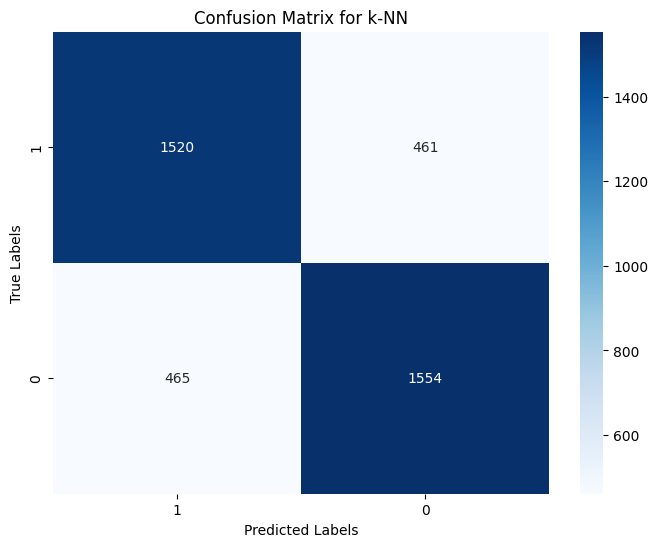

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['toxic'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Inisialisasi k-NN dengan parameter n_neighbors=7
knn_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='uniform')

# Melatih model dengan data latih
knn_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_knn = knn_model.predict(X_test)

# Evaluasi k-NN
print("Akurasi k-NN:", accuracy_score(y_test, y_pred_knn))
TFIDFKNNTujuh = accuracy_score(y_test, y_pred_knn)
print("Classification Report k-NN:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['toxic'].unique(), yticklabels=data['toxic'].unique())
plt.title('Confusion Matrix for k-NN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

TF IDF + Support Vector Machine

Akurasi SVM: 0.90725
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1981
           1       0.92      0.89      0.91      2019

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000

Confusion Matrix:
 [[1520  461]
 [ 465 1554]]


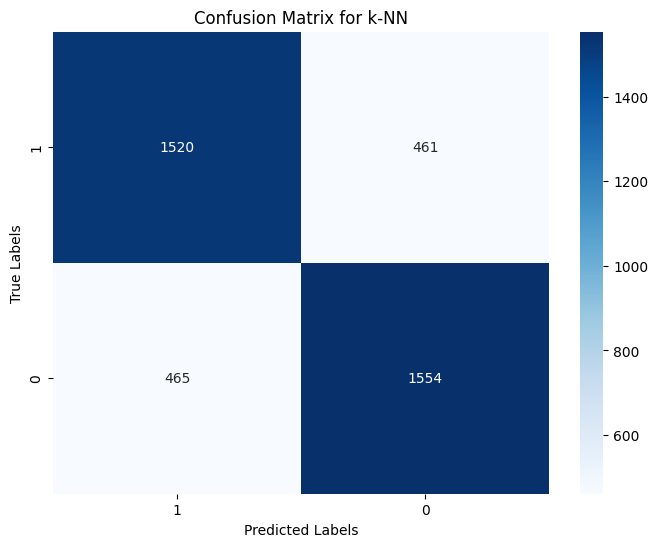

In [76]:
from sklearn.svm import SVC

# Inisialisasi SVM dengan kernel 'linear' dan C=1.0
svm_model = SVC(kernel='linear', C=1.0)

# Melatih model dengan data latih
svm_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)

# Evaluasi SVM
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
TFIDFSVM = accuracy_score(y_test, y_pred_svm)
print("Classification Report SVM:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['toxic'].unique(), yticklabels=data['toxic'].unique())
plt.title('Confusion Matrix for k-NN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Evaluasi Model


Urutan Model Berdasarkan Akurasi:
        Model  Accuracy
TFIDF KNN N=3   0.52050
TFIDF KNN N=5   0.53650
  BOW KNN N=3   0.72325
  BOW KNN N=5   0.74575
TFIDF KNN N=7   0.76850
  BOW KNN N=7   0.76950
      BOW SVM   0.89150
    TFIDF SVM   0.90725


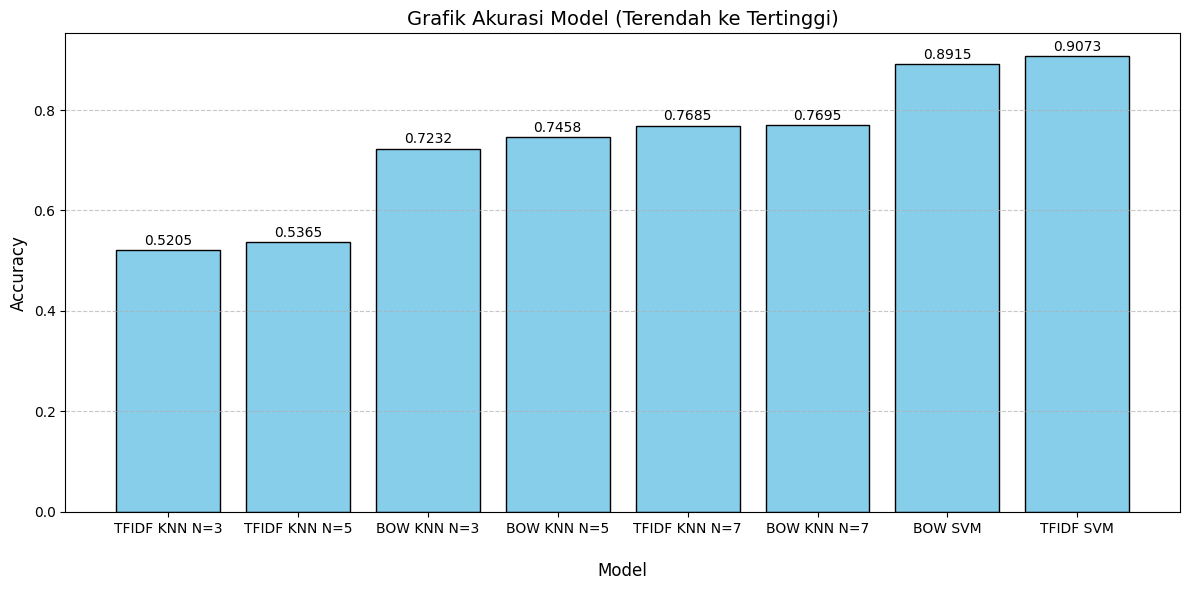

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary untuk menyimpan akurasi
accuracy_dict = {
    "BOW KNN N=3": BOWKNNTiga,
    "BOW KNN N=5": BOWKNNLima,
    "BOW KNN N=7": BOWKNNTujuh,
    "BOW SVM": BOWSVM,
    "TFIDF KNN N=3": TFIDFKNNTiga,
    "TFIDF KNN N=5": TFIDFKNNLima,
    "TFIDF KNN N=7": TFIDFKNNTujuh,
    "TFIDF SVM": TFIDFSVM,
}

# Mengurutkan model berdasarkan akurasi dari yang tertinggi ke yang terendah
sorted_accuracy = sorted(accuracy_dict.items(), key=lambda x: x[1], reverse=False)  # Untuk tampilan naik-turun

# Membuat DataFrame
accuracy_df = pd.DataFrame(sorted_accuracy, columns=["Model", "Accuracy"])

# Menampilkan tabel
print("\nUrutan Model Berdasarkan Akurasi:")
print(accuracy_df.to_string(index=False))

# Membuat grafik batang
plt.figure(figsize=(12, 6))
bars = plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"], color='skyblue', edgecolor='black')

# Menambahkan nilai di atas setiap batang
for bar, accuracy in zip(bars, accuracy_df["Accuracy"]):
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posisi horizontal di tengah batang
             accuracy + 0.005,  # Sedikit di atas batang
             f"{accuracy:.4f}",  # Format nilai
             ha='center', va='bottom', fontsize=10)

# Pengaturan sumbu dan judul
plt.title("Grafik Akurasi Model (Terendah ke Tertinggi)", fontsize=14)
plt.xlabel("\nModel", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks()  # Memiringkan label untuk keterbacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()
